# Import Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv('ready_returns.csv', header = None)

C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Check Bitcoin Returns for stationarity

In [3]:
df3 = pd.read_csv('fourGreta.csv')

In [10]:
daily = df[1]

In [4]:
daily.to_csv('returns2.csv', index = False)

In [9]:
#df[1] = df[1]/100

In [12]:
df3['price']

0        771.40
1        802.39
2        818.72
3        859.51
4        933.53
5        953.29
6        802.00
7        842.72
8        846.86
9        868.48
10       913.95
11       863.22
12       841.20
13       833.27
14       860.90
15       835.63
16       814.64
17       840.00
18       870.96
19       870.20
20       863.91
21       845.59
22       822.04
23       797.07
24       853.61
25       885.28
26       771.39
27       812.51
28       826.00
29       819.03
         ...   
1527    9395.01
1528    9337.55
1529    8866.00
1530    9578.63
1531    9205.12
1532    9194.85
1533    8269.81
1534    8300.86
1535    8338.35
1536    7916.88
1537    8223.68
1538    8630.65
1539    8913.47
1540    8929.28
1541    8728.47
1542    8879.62
1543    8668.12
1544    8495.78
1545    8209.40
1546    7833.04
1547    7954.48
1548    7165.70
1549    6890.52
1550    6973.53
1551    6844.23
1552    7083.80
1553    7456.11
1554    6853.84
1555    6811.47
1556    6636.32
Name: price, Length: 155

In [5]:
def check_stationarity(array1):
    #input_ad = array1.reshape(array1.shape[0],)   
    input_ad = array1
    print('data shape: %s'%input_ad.shape)
    result = adfuller(input_ad)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %.3f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
    if result[0] < result[4]['1%']:
        print('Data is stationary as fuck')
    elif result[0] < result[4]['5%']:
        print('Date is kinda stationary')
    else:
        print('You done fucked up son')

In [6]:
check_stationarity(df[1])

data shape: 1557
ADF Statistic: -22.503391
p-value: 0.000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Data is stationary as fuck


In [7]:
df3.columns

Index(['date', 'returns', 'sentiment', 'price'], dtype='object')

In [13]:
check_stationarity(df3['price'])

data shape: 1557
ADF Statistic: -1.941553
p-value: 0.313
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
You done fucked up son


In [22]:
meme = df3['price']

In [25]:
meme2 = []
for i in range(len(meme) - 1):
    meme2.append(meme[i+1] - meme[i])

In [28]:
check_stationarity(np.array(meme2))

data shape: 1556
ADF Statistic: -6.399558
p-value: 0.000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Data is stationary as fuck


# Preprocessing

In [11]:
# split into training and test
training = df.iloc[:-32,:]
testing = df.iloc[-32:,:]   #data from 2018-03-06 to 2018-04-06
assert len(training) + len(testing) == len(df) #check if we don't lose any data

# closing prices into arrays for further analysis
training_data = training[1].values
testing_data = testing[1].values

# perform strandardization on data
#training_data = training_data.reshape(-1,1)  # skip for now
#testing_data = testing_data.reshape(-1,1)   # skip for now

In [12]:
"""
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()
scaler_train.fit(training_data)
scaler_test.fit(testing_data)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaler_train = StandardScaler()\nscaler_test = StandardScaler()\nscaler_train.fit(training_data)\nscaler_test.fit(testing_data)\n'

In [13]:
#training_data = scaler_train.transform(training_data)
#testing_data = scaler_test.transform(testing_data)

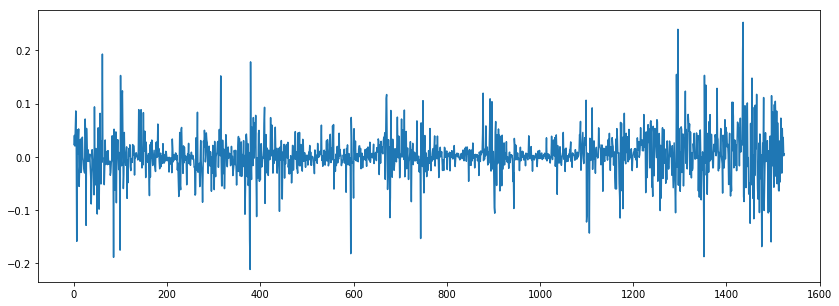

In [14]:
plt.figure(figsize= (14,5))
plt.plot(training_data)
plt.show()

# ARIMA STUFF

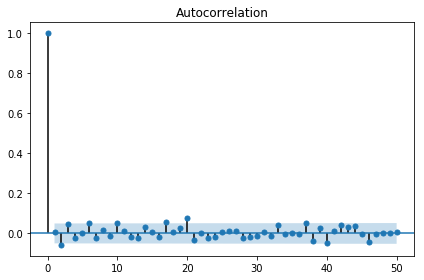

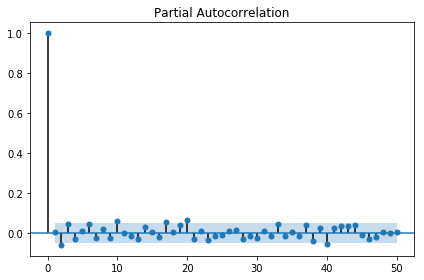

In [15]:
plot_acf(df[1], lags=50)
plt.tight_layout()
plt.show()

plot_pacf(df[1], lags=50)
plt.tight_layout()
plt.show()

In [16]:
model = ARIMA(list(training_data), order = (2,1,2))
result = model.fit(disp = 0)
print(result.summary())

C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be t

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1524
Model:                 ARIMA(2, 1, 2)   Log Likelihood                2742.481
Method:                       css-mle   S.D. of innovations              0.040
Date:                Sat, 28 Apr 2018   AIC                          -5472.961
Time:                        13:52:45   BIC                          -5440.986
Sample:                             1   HQIC                         -5461.059
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.486e-06   2.11e-06      3.548      0.000    3.35e-06    1.16e-05
ar.L1.D.y      0.5672        nan        nan        nan         nan         nan
ar.L2.D.y     -0.0374      0.025     -1.493      0.1

C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


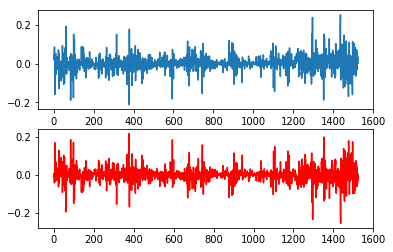

In [17]:
plt.subplot(211)
plt.plot(training_data)
plt.subplot(212)
plt.plot(result.fittedvalues, color='red')

In [11]:
output = result.forecast(steps = 32,)

In [12]:
output[0].mean()

0.8461656048057947

In [13]:
testing_data.mean()

-1.6246395230401842

---

# SVR

In [14]:
from sklearn.svm import SVR

In [15]:
reg = SVR()

In [16]:
training_data

array([2.30633546, 4.01737101, 2.03516993, ..., 3.63779045, 0.19930895,
       0.52724841])

In [17]:
features = training_data[:-1]
target = training_data[1:]

assert len(features) == len(target)

---

In [22]:
features = features.reshape(-1,1)

In [19]:
target

array([4.01737101, 2.03516993, 4.98216729, ..., 3.63779045, 0.19930895,
       0.52724841])

In [24]:
from sklearn.svm import SVR

In [25]:
ml = SVR()

In [26]:
ml.fit(features,target)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
testing_data

array([ -6.85543449,  -7.55415171,  -5.72531225,  -0.61160126,
        -5.05003989,   8.0377848 ,  -3.89940941,  -0.11156834,
       -10.06041425,   0.37546207,   0.45163995,  -5.05459713,
         3.87526399,   4.94875773,   3.27692584,   0.177372  ,
        -2.24889353,   1.73168952,  -2.38185868,  -1.98820505,
        -3.37085   ,  -4.58450069,   1.55035593,  -9.91617302,
        -3.84023892,   1.20469863,  -1.85415421,   3.50032071,
         5.25579491,  -8.07753641,  -0.6181936 ,  -2.57139795])

In [30]:
training_data

array([2.30633546, 4.01737101, 2.03516993, ..., 3.63779045, 0.19930895,
       0.52724841])

In [33]:
features_test = testing_data[:-1]
target_test = testing_data[1:]

In [32]:
features_test

array([ -6.85543449,  -7.55415171,  -5.72531225,  -0.61160126,
        -5.05003989,   8.0377848 ,  -3.89940941,  -0.11156834,
       -10.06041425,   0.37546207,   0.45163995,  -5.05459713,
         3.87526399,   4.94875773,   3.27692584,   0.177372  ,
        -2.24889353,   1.73168952,  -2.38185868,  -1.98820505,
        -3.37085   ,  -4.58450069,   1.55035593,  -9.91617302,
        -3.84023892,   1.20469863,  -1.85415421,   3.50032071,
         5.25579491,  -8.07753641,  -0.6181936 ])

In [34]:
target_test

array([ -7.55415171,  -5.72531225,  -0.61160126,  -5.05003989,
         8.0377848 ,  -3.89940941,  -0.11156834, -10.06041425,
         0.37546207,   0.45163995,  -5.05459713,   3.87526399,
         4.94875773,   3.27692584,   0.177372  ,  -2.24889353,
         1.73168952,  -2.38185868,  -1.98820505,  -3.37085   ,
        -4.58450069,   1.55035593,  -9.91617302,  -3.84023892,
         1.20469863,  -1.85415421,   3.50032071,   5.25579491,
        -8.07753641,  -0.6181936 ,  -2.57139795])